### Problem Statement
Predict the safety of the car. I have used the [Car Evaluation Data](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) Set for this project, downloaded from the UCI Machine Learning Repository website.

### Dataset Description
* Class Values:unacc, acc, good, vgood(Target)
* buying: vhigh, high, med, low.
* maint: vhigh, high, med, low.
* doors: 2, 3, 4, 5more.
* persons: 2, 4, more.
* lug_boot: small, med, big.
* safety: low, med, high.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df = pd.read_csv('car.data', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Exploratory Data Analysis(EDA)
Explore the dataset to gain more insights

In [3]:
df.shape

(1728, 7)

As we can see that there is no header in the dataset,it's taking the default indexes, we can add column names as given in dataset description

In [4]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### View summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values for each features

In [6]:
for col in names:
  print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


* From the above distribution we can see that each feature is of categorical type
* class is a target column

### Check the Missing Values

In [7]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Declaration of feature vector and target variable

In [8]:
X = df.drop(columns='class')
y = df['class']

### Split data into training and test set

In [9]:
# split X and y into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

In [10]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

### Define a separate encoder for the target and the inputs

In [11]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
encoder = OrdinalEncoder()
enc_target = LabelEncoder()

### Apply the fit_transform() method on the training data and the transform() method on the test data.


### Random Forest Classifier model with default parameters

In [12]:
x_train_transf = encoder.fit_transform(X_train)
x_test_transf = encoder.transform(X_test)

y_train_transf = enc_target.fit_transform(y_train)
y_test_transf = enc_target.transform(y_test)

In [13]:
# Import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the object
rfc = RandomForestClassifier(random_state=13)

# Fit the Model
rfc.fit(x_train_transf, y_train_transf)

RandomForestClassifier(random_state=13)

In [14]:
# Predict the Test set results

y_pred = rfc.predict(x_test_transf)
y_pred[:5]

array([0, 1, 2, 2, 0])

In [15]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_transf, y_pred)))

Model accuracy score with 100 decision-trees : 0.9740


### Find important features with Random Forest 
If required we can drop the least imp feature also and build the model

In [16]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.265583
persons     0.223169
buying      0.196308
maint       0.168047
lug_boot    0.080602
doors       0.066291
dtype: float64

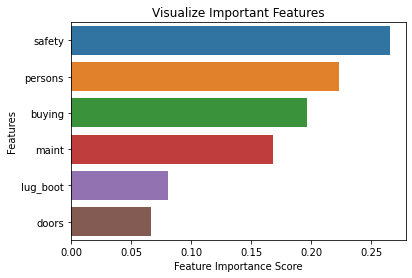

In [17]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualize Important Features")

# Visualize the graph

plt.show()

In [18]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_transf, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 82   3   1   0]
 [  1  14   0   0]
 [  2   0 232   0]
 [  2   0   0   9]]


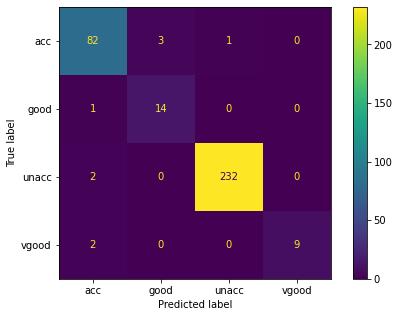

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred),
    display_labels=["acc", "good", "unacc", "vgood"],
)

cmp.plot(ax=ax);

#### Happy Learning !!
You can connect and follow me @
  * [LinkedIn](https://www.linkedin.com/in/priya-singh1803)
  * [Github](https://github.com/piyu18/)
  * [Medium](https://medium.com/@priya1803)